# Activation Functions - dimensions

In [9]:
import torch.nn

m = torch.nn.Softmax(dim=1)
img = torch.randn(1, 2, 3)
model_output = m(img)

print(img)
print(model_output)

tensor([[[-0.0512,  0.0511,  0.0087],
         [-0.0934, -1.7486,  0.4311]]])
tensor([[[0.5105, 0.8581, 0.3960],
         [0.4895, 0.1419, 0.6040]]])


# Rampup function visualisation

0.010132432219606831


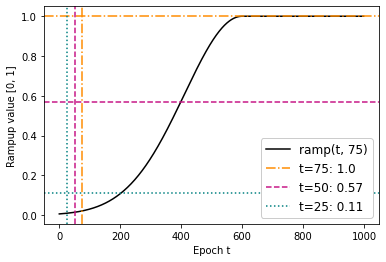

In [31]:
import numpy as np
import matplotlib.pyplot as plt

currents = range(0, 1000)
rampup_length = 600

results = []
for current in currents:
    current = np.clip(current, 0.0, rampup_length)
    result = float(np.exp(-5.0 * (1.0 - current / rampup_length) ** 2))
    results.append(result)

print(results[25])
    
plt.figure()
plt.plot(currents, results, color = 'k', label = "ramp(t, 75)")
plt.xlabel("Epoch t")
plt.ylabel("Rampup value [0, 1]")
plt.axvline(x = 75, color = 'darkorange', label = 't=75: 1.0', linestyle = '-.')
plt.axhline(y = 1, color = 'darkorange', linestyle = '-.')
plt.axvline(x = 50, color = 'mediumvioletred', label = 't=50: 0.57', linestyle = '--')
plt.axhline(y = 0.57, color = 'mediumvioletred', linestyle = '--')
plt.axvline(x = 25, color = 'teal', label = 't=25: 0.11', linestyle = ':')
plt.axhline(y = 0.11, color = 'teal', linestyle = ':')
plt.legend(loc = 'lower right', facecolor="white", framealpha=1, fontsize="large")
plt.savefig("example_results/rampup.png", dpi=1200)


# dict from keys

In [47]:
b_keys = [  'loss',
            'acc', 'fscore', 'fmicro', 'jac', 'prec', 'rec',
            'symhd' # task specific: segmentation
        ]

# everything we want to track
batch_collector = { key : [] for key in b_keys }

print(batch_collector)

for i in range(5):
    batch_collector["loss"].append(4)
    # batch_collector["acc"] = 1.0

print(batch_collector)

{'loss': [], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}
{'loss': [4, 4, 4, 4, 4], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}


In [48]:
Details = {"Destination": "China", 
           "Nationality": "Italian", "Age": []}

for i in range(5):
    Details["Age"].append(2) # [20, "Twenty"]
    
print(Details)

{'Destination': 'China', 'Nationality': 'Italian', 'Age': [2, 2, 2, 2, 2]}


In [76]:
for key in batch_collector.keys():
    print(key, np.mean(batch_collector[key]))
    

loss 4.0
acc nan
fscore nan
fmicro nan
jac nan
prec nan
rec nan
symhd nan


In [46]:
# set of vowels
keys = {'a', 'e', 'i', 'o', 'u' }

# assign empty list to value
value = []

# creates a dictionary with keys and values
vowels = { key : [] for key in keys }

vowels["a"].append("hi")

print(vowels)

{'a': ['hi'], 'o': [], 'u': [], 'i': [], 'e': []}


# Grid Search

In [77]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Domain shift dependent on two features

In [51]:
import glob
import skimage.io
import numpy as np

domain1 = glob.glob('C:/snec_data/Result_Data/cirrus/enface/*_cube_z.tif')
domain2 = glob.glob('C:/snec_data/Result_Data/plex/enface/*_cube_z.tif')
domain3 = glob.glob('C:/Users/Prinzessin/projects/image_data/iChallenge_AMD_OD_Fovea_lesions/images_AMD/*.jpg')
# domain2 = glob.glob('C:/Users/Prinzessin/projects/image_data/iChallenge_AMD_OD_Fovea_lesions/images_Non-AMD/*.jpg')


mean1 = []
mean2 = []
mean3 = []

median1 = []
median2 = []
median3 = []

for path in domain1:
    #print(path)
    image = skimage.io.imread(path)
    mean1.append(np.mean(image))
    median1.append(np.median(image))    
print("done domain 1")    

for path in domain2:
    #print(path)
    image = skimage.io.imread(path)
    mean2.append(np.mean(image))
    median2.append(np.median(image))
print("done domain 2")    

for path in domain3:
    #print(path)
    image = skimage.io.imread(path)
    mean3.append(np.mean(image))
    median3.append(np.median(image))
print("done domain 3")    
    
import matplotlib.pyplot as plt

print(mean2)
print(median2)

print(mean1)
print(median1)
    

done domain 1
done domain 2
done domain 3
[210.213684]
[211.0]
[175.2397224489796]
[176.0]


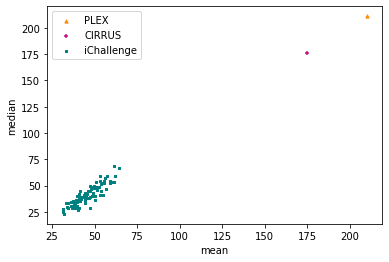

In [52]:
plt.figure()
plt.xlabel("mean")
plt.ylabel("median")
plt.scatter(mean2, median2, label="PLEX", color = 'darkorange', s=10, marker='^')
plt.scatter(mean1, median1, label="CIRRUS",  color = 'mediumvioletred', s=10, marker='+')
plt.scatter(mean3, median3, label="iChallenge", color = 'teal', s=7, marker=',')

plt.legend()
plt.savefig("example_results/domainshift.png", dpi=1200)

# Mean and average images
* https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

In [162]:
domain1 = glob.glob('C:/snec_data/Result_Data/cirrus/enface/*_cube_z.tif')
domain2 = glob.glob('C:/snec_data/Result_Data/plex/enface/*_cube_z.tif')
domain3 = glob.glob('C:/Users/Prinzessin/projects/image_data/iChallenge_AMD_OD_Fovea_lesions/images_AMD/*.jpg')

from skimage.transform import rescale, resize, downscale_local_mean

# making n X m matrix
def img2np(paths, size = (150, 150)):
    # iterating through each file
    
    images = []
    current_image = None
    
    for i, path in enumerate(paths):
                
        current_image = skimage.io.imread(path, as_gray=True)
        current_image = resize(current_image, size, anti_aliasing=True)
                
        images.append(current_image)
        
        stacked = np.stack(images, axis=-1)  
    
    return stacked


In [163]:
# run it on our folders
domain2_images = img2np(domain2)
print("done 2")
domain3_images = img2np(domain3)
print("done 3")

done 2
done 3


In [151]:
def find_mean_img(full_mat, title, f):
    # calculate the average
    result = np.mean(full_mat, axis = 2)
    
    f.imshow(result, cmap='gray')
    f.set_title(f'Mean {title}')
    f.axis('off')
    return result

def find_std_img(full_mat, title, f):
    # calculate the standard deviation
    result = np.std(full_mat, axis = 2)

    f.imshow(result, cmap='gray')
    f.set_title(f'Mean {title}')
    f.axis('off')
    return result

C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_32352\2190325356.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


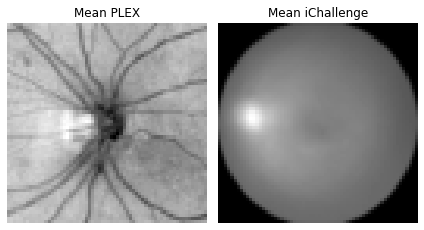

In [156]:
fig, axs = plt.subplots(1, 2)
plex_mean = find_mean_img(domain2_images, "PLEX", axs[0])
ichallenge_mean = find_mean_img(domain3_images, "iChallenge", axs[1])
fig.tight_layout()
fig.savefig(f"example_results/domain_shift_mean.png", dpi=1200)
fig.show()

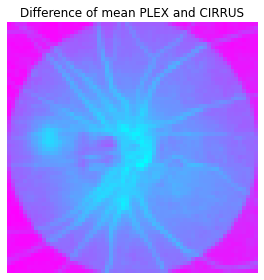

In [164]:
contrast_mean = plex_mean - ichallenge_mean
plt.imshow(contrast_mean, cmap='cool')
plt.title(f'Difference of mean PLEX and CIRRUS')
plt.axis('off')
plt.tight_layout()
plt.savefig(f"example_results/domain_shift_diff_mean.png", dpi=1200)
plt.show()

C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_32352\2524335081.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


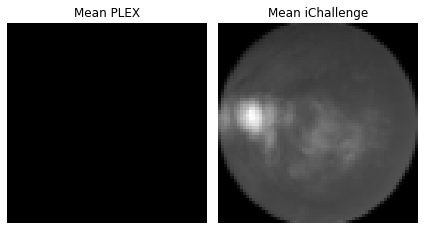

In [161]:
fig, axs = plt.subplots(1, 2)
plex_std = find_std_img(domain2_images, "PLEX", axs[0])
ichallenge_std = find_std_img(domain3_images, "iChallenge", axs[1])
fig.tight_layout()
fig.savefig(f"example_results/domain_shift_std.png", dpi=1200)
fig.show()